# 4절. 복사와 뷰

## 4.1 모두 복사 안 함 (스칼라 변수만 제외)

In [1]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
a.shape, type(a), a.ndim

((12,), numpy.ndarray, 1)

- 복사가 안되고 주소값만 전달

In [5]:
b = a #a와b는 같은 numby배열 객체이지만 이름만 다름 
       #지금 b도  'array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])'를 가리킴

In [6]:
b is a

True

In [7]:
b.shape, b.ndim

((12,), 1)

In [9]:
b.shape =(3,4)  
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [10]:
a  #b를바꿨는데 a도 바뀜     왜냐하면 둘은 같은 주소를 가리키고 있기때문에 (함수를 전달될때 '주소'를 전달)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [11]:
def f(data):
    print(id(data))

In [12]:
f(a)

2481510057184


## 4.2 얕은 복사: 뷰(view)
- 뷰. 가짜 데이터 (창문만 열어서 보여줌)  / 진짜 데이터는 '변수'에 있음

In [13]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

- c가 메모리를 직접 소유하지는 않음 
- c는 a의 **데이터(SAME**)를 참조하지만, **'구조'(DIFFERENT**)는 따로 가지고 있다 


In [16]:
c = a.view()
c is a    # 여기는 true가 안나옴. 
          # c는 a의 데이터(SAME)를 참조하지만, '구조'(DIFFERENT)는 따로 가지고 있다  ***
                                                         #뷰를 만들때 구조따로 있다. 

False

In [15]:
b = a
b is a

True

In [17]:
c.flags.owndata  # c가 메모리를 직접 소유하지는 않음 

False

In [18]:
a.flags.owndata

True

In [19]:
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [21]:
c.shape, c.ndim

((3, 4), 2)

In [22]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [23]:
c.shape =(2,6)

In [24]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [25]:
a                      #c와a 따로 놀고있다 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
c[:,2]=999   # 2 대신 999, 8대신 999  #모든행의 2열들을 999로바꾸겠다 

In [28]:
c     # 2대신 999

array([[  0,   1, 999,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11]])

In [29]:
a

array([[  0,   1, 999,   3],
       [  4,   5,   6,   7],
       [999,   9,  10,  11]])

In [30]:
a = np.arange(12).reshape(3,4)
s = a[:,1:3] #슬라이싱 될때 뷰가 반환됨 
print(a)
print(s)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 1  2]
 [ 5  6]
 [ 9 10]]


In [31]:
s[:,0]=99   #1대신 99, 5대신99, 9대신 99

In [32]:
s

array([[99,  2],
       [99,  6],
       [99, 10]])

## 4.3 깊은 복사; copy

In [35]:
a = np.arange(12).reshape(3,4)
d=a.copy()  #d를 바꾸면 a가 바뀐다
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [36]:
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [37]:
d is a   # TRUE FALSE는 '주소'를 기준    #d는 a를 copy한 것. 둘은 다른 주소를 가르키고 있음 **

False

In [38]:
d.flags.owndata #d객체가 메모리를 직접소유     ##d는 자신의 메모리를 소유하고 있음 

True

In [39]:
d.base is a #d와a는 어떤 것도 공유하지 않고 있다   #d는 자신의 메모리 소유, a와 같지도 않다

False

In [40]:
d.shape=(2,6)

In [41]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [43]:
# d[0,...] = [99,99,99,99]
# d[0] = [99,99,99,99]
d[0]=99

In [44]:
d

array([[99, 99, 99, 99, 99, 99],
       [ 6,  7,  8,  9, 10, 11]])

In [45]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

# 5절. 고급 인덱싱(indexing)

## 5.1 인덱스 배열로 인덱싱

In [46]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121],
      dtype=int32)

In [48]:
i = np.array([1,1,3,8,5])

In [49]:
a[i]

array([ 1,  1,  9, 64, 25], dtype=int32)

In [50]:
l =[1,1,3,8,5]
a[l]

array([ 1,  1,  9, 64, 25], dtype=int32)

In [51]:
j = np.array([ [3,4],[9,7] ])   # a의9번째  7번째 아이    ***************????

In [52]:
a[j]

array([[ 9, 16],
       [81, 49]], dtype=int32)

- 2차원

In [53]:
b = np.arange(24).reshape(4,6)
b

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

**인덱스의 단일 배열은 첫번째 차원 참조 (노트 p49)**

In [58]:
palette = np.array([[0,0,0],   # black
                   [255,0,0], # red
                   [0,255,0], # grren
                   [0,0,255], # blue
                   [255,255,255]] # white
                  )
palette

array([[  0,   0,   0],
       [255,   0,   0],
       [  0, 255,   0],
       [  0,   0, 255],
       [255, 255, 255]])

점 하나씩 하나씩 컬러를 할당

In [61]:
#palette의index를 가지고 있는아이. 
 #(이미지의 색상정보를 가지고 있는아이) 진짜 이미지 데이터는 아님. 이미지가 아님
image_index=np.array([[4,4,4,0,0,0,0,4,4,4],
                     [4,0,0,4,4,4,4,0,0,4],
                     [0,0,4,4,4,4,4,4,0,0],
                     [0,4,4,1,4,4,3,4,4,0],
                     [0,4,4,1,4,4,3,4,4,0],
                     [0,4,4,4,4,4,4,4,4,0],
                     [0,4,4,2,4,4,2,4,4,0],
                     [4,0,4,4,2,2,4,4,0,4],
                     [4,4,0,4,4,4,4,0,4,4], 
                     [4,4,4,0,0,0,0,4,4,4]            
                     ])
image_index

array([[4, 4, 4, 0, 0, 0, 0, 4, 4, 4],
       [4, 0, 0, 4, 4, 4, 4, 0, 0, 4],
       [0, 0, 4, 4, 4, 4, 4, 4, 0, 0],
       [0, 4, 4, 1, 4, 4, 3, 4, 4, 0],
       [0, 4, 4, 1, 4, 4, 3, 4, 4, 0],
       [0, 4, 4, 4, 4, 4, 4, 4, 4, 0],
       [0, 4, 4, 2, 4, 4, 2, 4, 4, 0],
       [4, 0, 4, 4, 2, 2, 4, 4, 0, 4],
       [4, 4, 0, 4, 4, 4, 4, 0, 4, 4],
       [4, 4, 4, 0, 0, 0, 0, 4, 4, 4]])

In [63]:
image_data = palette[image_index]   #체도까지 들어가면 3차원
image_data

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 

In [64]:
image_data.shape

(10, 10, 3)

**from matplotlib import pyplot**     (pyplot안에 많은 것이 담겨있다)
- %matplotlib inline    주피터노트북을 실행한 브라우저에서 그림을 바로 볼 수 있게 

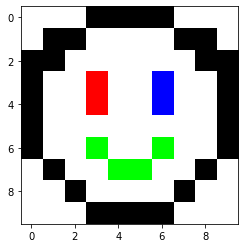

In [66]:
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt 
%matplotlib inline
plt.imshow(image_data,interpolation='nearest')
plt.show()                            #얼굴사진으로 건물 출입. 5년후 유출할 수 있는 사진. cctv로 10장, 100장 사진. 딥러딩. 

**tensorflow패키지 install**
- anaconda prompr 실행 --> pip install tensorflow 

In [69]:
import tensorflow.keras.datasets.mnist as mnist
mnist = mnist.load_data()
mnist[0][0].shape

(60000, 28, 28)

- machine learning시 활용 

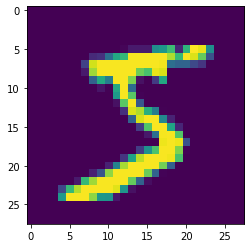

In [76]:
mnist_data = mnist[0][0]
import matplotlib.pyplot as plt
plt.imshow(mnist_data[0])   #[]안에 숫자 다른거 넣으면 그림도 바뀜   #machine learning시 활용 

In [77]:
mnist_data[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# uint8 중 u는 0을 포함한 자연수 

## 5.2 다차원 인덱싱

In [78]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [79]:
i = np.array([ [0,1],
               [1,2]])
j = np.array([[2,1],
              [3,3]])
print(i)
print(j)

[[0 1]
 [1 2]]
[[2 1]
 [3 3]]


In [80]:
a[i,j]

array([[ 2,  5],
       [ 7, 11]])

In [81]:
a[i] #행만 기입하면 열은 모든 열을 의미 

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [82]:
a[i].shape

(2, 2, 4)

In [83]:
a[i,]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [84]:
a[i,...]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [85]:
a[i,]==a[i]

array([[[ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True]]])

In [87]:
np.all(a[i,]==a[i])  #all  모든 요소가 True 일 때만 True 

True

In [88]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [89]:
i

array([[0, 1],
       [1, 2]])

In [90]:
a[i,np.array([[2,2,],[2,2]])]  #0행2열, 1행2열, 
                               #1행2열, 2행2열

array([[ 2,  6],
       [ 6, 10]])

In [91]:
a[i,2]

array([[ 2,  6],
       [ 6, 10]])

## 5.3 argmax; 최대값이 있는 곳의 index

In [93]:
data = np.sin(np.arange(20)).reshape(5,4)
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [94]:
ind = data.argmax(axis=0) #각 열에서 큰값이 있는 index    #행을 무시하고, '열'만.   한 열에서 최대값max의 index를 반환. *****
ind   #출력값은  max값이 있는 '행'을 출력     2헹0열    0행1열   3행3열   1행1열  ***********************************

array([2, 0, 3, 1], dtype=int64)

In [ ]:
#array([2, 0, 3, 1], dtype=int64)   

In [96]:
data_col_max = data[ind,range(data.shape[1])]  # 열: ind    행: range(data.shape[1])   ==> 위 reshape(5,4) 중 1번방  ==>즉 4 
                                                        #************************************************
data_col_max 

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [99]:
for i, item in enumerate(data_col_max):
    print("{}번째 열의 최대값은{:.5f}".format(i,item))  #{:.5f} 소수점 5자리까지만

0번째 열의 최대값은0.98936
1번째 열의 최대값은0.84147
2번째 열의 최대값은0.99061
3번째 열의 최대값은0.65699


In [100]:
data.max(axis=0)

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [101]:
np.all(data.max(axis=0) == data_col_max)

True

In [ ]:
#행마다 최대값을 출력하기 (argmax함수를 이용)

In [104]:
ind = data.argmax(axis=1) #열을 고정 , 행을 바꿈
ind

array([2, 3, 0, 2, 3], dtype=int64)

In [106]:
data_row_max = data[range(data.shape[0]),ind]
data_row_max

array([0.90929743, 0.6569866 , 0.98935825, 0.99060736, 0.14987721])

In [107]:
for i, item in enumerate(data_row_max):
    print("{}번째 행의 최대값은{:.5f}".format(i,item))

0번째 행의 최대값은0.90930
1번째 행의 최대값은0.65699
2번째 행의 최대값은0.98936
3번째 행의 최대값은0.99061
4번째 행의 최대값은0.14988


## 5.3 인덱싱을 이용한 값 변경

In [108]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [109]:
a[ [1,3,4] ]=0  #여기서는 c안 붙이고 list만들어  a[ c[1,3,4] ]=0 와 같음 
a

array([0, 0, 2, 0, 0])

In [110]:
a = np.arange(5)
a[[0,0,2]]= [99,999,999]       #왜 99는 없는지?????????????????????????????????
a

array([999,   1, 999,   3,   4])

list에서 똑같은 index가 2번 나오면, 뒤에 것만 실행함 

In [111]:
a = np.arange(5)
print('변경전:',a)
a[[0,0,2]] +=1  #list에서 똑같은 index가 2번 나오면, 뒤에 것만 실행함  #0번 index가 2번 증가하지 않습니다.
print('변경후:',a)

변경전: [0 1 2 3 4]
변경후: [1 1 3 3 4]


## 5.4 논리 배열을 이용한 인덱싱(indexing)

In [112]:
a = np.arange(20).reshape(4,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [116]:
b=a%2==0
b

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

In [117]:
a[b]  #인덱스가 1차원이면, 1차원으로 반환

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [118]:
a[b] = a[b]**2

In [119]:
a

array([[  0,   1,   4,   3,  16],
       [  5,  36,   7,  64,   9],
       [100,  11, 144,  13, 196],
       [ 15, 256,  17, 324,  19]])

## 5.5 ix_()함수
- N개의 1차원 시퀀스 배열을 입력받아 N차원 N개를 반환

In [121]:
a = np.array([1,2,3,4])
b = np.array([11,12,13])
np.ix_(a,b)

(array([[1],
        [2],
        [3],
        [4]]),
 array([[11, 12, 13]]))

In [126]:
ax, bx = np.ix_(a,b)

In [127]:
print(ax)
print(bx)

[[1]
 [2]
 [3]
 [4]]
[[11 12 13]]


In [129]:
a[:,np.newaxis]

array([[1],
       [2],
       [3],
       [4]])

In [128]:
ax.shape,ax.ndim

((4, 1), 2)

In [130]:
bx.shape,bx.ndim

((1, 3), 2)

In [131]:
r = np.add(ax,bx)
r

array([[12, 13, 14],
       [13, 14, 15],
       [14, 15, 16],
       [15, 16, 17]])

In [133]:
print(a[1]+b[2])
print(r[1,2])

15
15


# 6절. 선형대수
- 2차원 넘파이 배열을 행렬
    - 행렬곱: @ 또는 np.dot()
    - 역행열: np.linalg.inv(x 
    - 전치행렬: x.T, x.transpose()
    - nxn단위행렬: np.eye(n)
    - 대각합: np.trace(x)
    - 연립방정식 해 풀기: np.linalg.solve(a,b) 

In [ ]:
# 5 2 1
# 4 2 3
# 2 5 3

## 6.1 선형 연립 방정식 풀이 (회귀도출); 독립변수 2개, 데이터2개

In [ ]:
#정방행렬 아니면 역행렬 못구함 
# 정방행렬 알면 역행렬 구할 수 있음 

- 독립변수

In [134]:
a = np.array([[1,2],  #공부는 1시간하고 기출문제 2번 품     #독립변수
            [3,4]])   #공부는 3시간하고 기출문제 4번 품
a

array([[1, 2],
       [3, 4]])

- 종속변수

In [136]:
y = np.array([[5],[7]])    #2행1열
y

array([[5],
       [7]])

**a @ X = y** <br>
** a가 정방행렬 <br>
**'a의 역행렬 @ a' @ X = a의 역행렬 @ y**  (단위행렬은 곱하나 안곱하나 같음. 따라서 오른쪽만 남겨짐) <br>
**X = a의 역행렬 @ y**

- a의 역행렬 @a 가 단위행렬인지 확인 

In [137]:
# a의 역행렬 @a 가 단위행렬인지 확인 
np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

In [138]:
a@np.linalg.inv(a)

array([[1.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 1.00000000e+00]])

In [140]:
np.eye(2) @ a == a

array([[ True,  True],
       [ True,  True]])

In [141]:
np.all(np.eye(2) @ a==a)

True

In [142]:
np.all(np.eye(2) ==a)

False

In [143]:
X = np.linalg.inv(a)@y   #기울기 
X

array([[-3.],
       [ 4.]])

In [144]:
#독립변수가 2,3일 경우  종속변수 값은?
2* X[0] + 3*X[1]

array([6.])

## 6.2 선형 연립 방정식 (회귀도출)과 그래프; 독립변수 1개

**정방행렬을 위해 데이터 2**

In [145]:
x=[2,3]
y=[6.8,7.3]

In [149]:
# 2 1
# 3 1 
A = np.column_stack( (x,np.ones(len(x))) )  #독립변수
A

array([[2., 1.],
       [3., 1.]])

In [150]:
Y = np.array(y)
Y

array([6.8, 7.3])

In [151]:
Y = np.array(y).reshape(2,1)
Y

array([[6.8],
       [7.3]])

**A@X = Y** <br>
A 독립변수<br>
Y 종속변수 <br>
**A의 역행렬 @ A @X =  A의 역행렬 @Y**

In [152]:
X = np.linalg.inv(A) @ Y          #0.5는x의 기울기  5.8이 절편
X

array([[0.5],
       [5.8]])

- 2차원 넘파이 배열을 행렬
    - 행렬곱: @ 또는 np.dot()
    - 역행열: np.linalg.inv(x 
    - 전치행렬: x.T, x.transpose()
    - nxn단위행렬: np.eye(n)
    - 대각합: np.trace(x)
    - 연립방정식 해 풀기: np.linalg.solve(a,b) 

In [153]:
#연립방정식을 구하는 함수 
np.linalg.solve(A,Y) 

array([[0.5],
       [5.8]])

In [158]:
X

array([[0.5],
       [5.8]])

In [159]:
f = A[:,0]*X[0] + X[1] #도출된 회귀식   X의0번방 [0.5],     X의1번방 [5.8]
f 

array([6.8, 7.3])

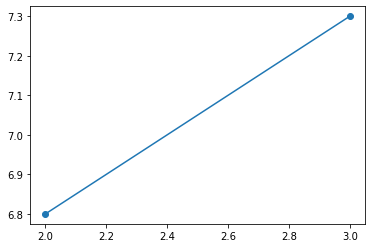

In [161]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
#plt.plot (x,y,'-')
plt.plot(A[:,0],f,'-')
plt.show()

**데이터를 n개**

In [162]:
x = [32,64,96,118,216,114,152,158] #독립변수 
y = [18,24,61.5,49,52,105,130,125]  #종속변수 

In [167]:
A = np.column_stack( (x,np.ones(len(x))) )
print(A) #독립변수 행렬
B = np.array(y).reshape(len(y),1)
print(B) #종속변수 행렬 

[[ 32.   1.]
 [ 64.   1.]
 [ 96.   1.]
 [118.   1.]
 [216.   1.]
 [114.   1.]
 [152.   1.]
 [158.   1.]]
[[ 18. ]
 [ 24. ]
 [ 61.5]
 [ 49. ]
 [ 52. ]
 [105. ]
 [130. ]
 [125. ]]


**A@X =B***<br>
**(A.T @A) @ X = A.T@B**  (A의 역행렬 @A) <br>
**(A.T @A)의 역행렬  @(A.T @A) @ X = (A.T @ A)의 역행렬 @A.T @B**<br>
**X=(A.T@A)의 역행렬 @A.T@B**


In [170]:
X = np.linalg.inv(A.T@A) @A.T@B
X

array([[ 0.40900507],
       [21.99314773]])

In [172]:
#np.linalg.solve(A,B)  #정방행렬일때만 가능     여기서 불가 

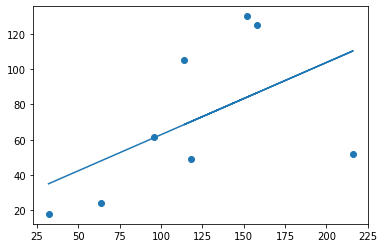

In [178]:
%matplotlib inline
plt.scatter(x,y)
plt.plot(A[:,0],A[:,0]*X[0]+X[1],'-')         #X[0] ==>기울기      X[1] ==> 절편 
plt.show()

# 7절. 유용한 팁

- 평균은 mu,  표준편차는sigma

In [180]:
mu, sigma = 2,0.5   #mu =>평균,  sigma=>표준편차
# 정규분포데이터 넘파이 배열 만들기 
v = np.random.normal(mu,sigma,100000)

In [181]:
(n,bins) = np.histogram(v,bins=50,density=True)   #bins  막대의 갯수
n, bins

(array([2.28958999e-04, 4.57917999e-04, 5.72397498e-04, 8.01356498e-04,
        1.83167200e-03, 2.28958999e-03, 4.46470049e-03, 9.73075747e-03,
        1.51112940e-02, 2.55289284e-02, 3.92664684e-02, 5.42632829e-02,
        7.77315803e-02, 1.17455967e-01, 1.58325148e-01, 2.18541365e-01,
        2.75094238e-01, 3.57061560e-01, 4.46012131e-01, 5.38282608e-01,
        6.00673935e-01, 6.96264317e-01, 7.61059714e-01, 7.68042963e-01,
        8.13033407e-01, 7.73080061e-01, 7.50298641e-01, 7.01186936e-01,
        6.25859425e-01, 5.58774438e-01, 4.74632006e-01, 4.04799511e-01,
        3.17795091e-01, 2.45901965e-01, 1.87975338e-01, 1.37375400e-01,
        9.68496567e-02, 6.97180153e-02, 4.76234719e-02, 3.02225879e-02,
        1.82022405e-02, 1.08755525e-02, 6.98324948e-03, 3.09094649e-03,
        2.06063099e-03, 1.14479500e-03, 5.72397498e-04, 4.57917999e-04,
        1.14479500e-04, 2.28958999e-04]),
 array([-0.16128651, -0.07393463,  0.01341726,  0.10076914,  0.18812102,
         0.27547291, 

In [182]:
len(n),len(bins)

(50, 51)

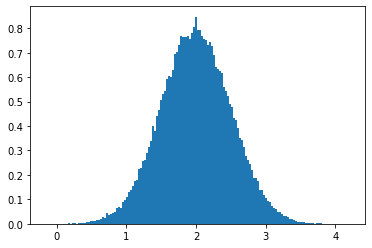

In [185]:
plt.hist(v,bins="auto",density=1)
plt.show()

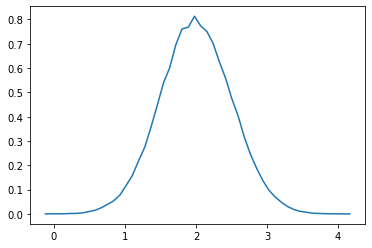

In [187]:
plt.plot( (bins[:-1]+bins[1:])/2, n)    #0번째부터 맨 마지막 뺸거   #0번째부터 끝까지  #len(n) == 50,len(bins)==51이기때문. 숫자맞출려고 